[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

# [RQ3] Do the all trips last the same? 

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import pylab as pyl

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [3]:
trip_duration=[]
for i,df_name in enumerate (df_names):
        # load the ith dataframe, taking only the t_pickup_datetime and tpep_dropoff_datetime columns
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=10000)
        #calculating duration of the trip and appending it to a list-'m' is for minutes
        trip_duration.append(round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm'),2))
trip_duration=pd.concat(trip_duration)

In [4]:
#checking if there is inconsistency with trip durations(e.g. negative and zero values) 
trip_duration[trip_duration<=0].count()

52

In [5]:
trip_duration[trip_duration>0].head()

0     5.77
1    24.65
2     4.22
3     5.93
4     3.53
dtype: float64

In [6]:
trip_duration=trip_duration[trip_duration>0]

In [7]:
len(trip_duration)

59948

In [8]:
mean=trip_duration.mean()
mean

15.563748582104413

In [9]:
std=trip_duration.std()
std

63.480523595094255

In [10]:
#trip_duration_by_minute=trip_duration.apply(lambda x : int(round(x)))

# 5-minute interval

In [11]:
#group by 5-min intervals
trip_duration_by_5minutes=trip_duration.groupby(pd.cut(trip_duration, np.arange(0, trip_duration.max()+1, 5))).count()
#.resample("5T")

In [12]:
trip_duration_by_5minutes.head(10)

(0.0, 5.0]      11382
(5.0, 10.0]     18401
(10.0, 15.0]    12295
(15.0, 20.0]     7395
(20.0, 25.0]     4286
(25.0, 30.0]     2644
(30.0, 35.0]     1399
(35.0, 40.0]      769
(40.0, 45.0]      454
(45.0, 50.0]      260
dtype: int64

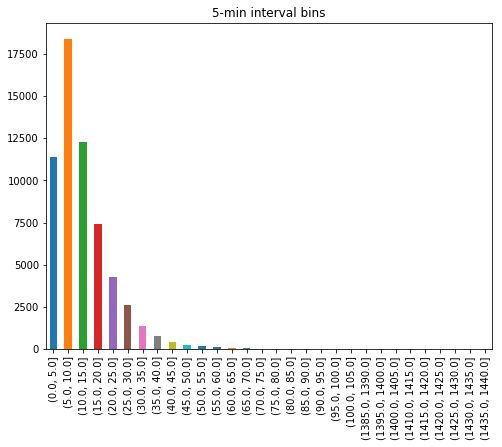

In [13]:
f = plt.figure() 
f.set_figheight(6)
f.set_figwidth(8)
plt.grid(color ='lightgray', linestyle = '-.') 
plt.title('5-min interval bins')
trip_duration_by_5minutes[trip_duration_by_5minutes>5].plot(kind = 'bar')#,grid=True)
plt.show()

# 10-minute interval

In [14]:
def make_bins(x):
    x=int(x)
    if x in range(0,10):
        return '0-10min'
    if x in range(10,20):
        return '10-20min'
    elif x in range(20,30):
        return '20-30min'
    elif x>30:
        return '>30min' 

In [15]:
trip_duration_bins=trip_duration.groupby(trip_duration.apply(make_bins)).count()
trip_duration_bins

0-10min     29730
10-20min    19723
20-30min     6945
>30min       3201
dtype: int64

In [16]:
trip_duration_bins.rename('trip duration')

0-10min     29730
10-20min    19723
20-30min     6945
>30min       3201
Name: trip duration, dtype: int64

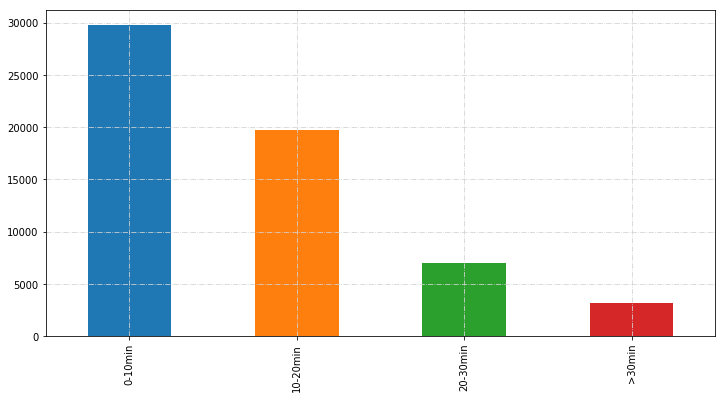

In [17]:
f = plt.figure() 
plt.grid(color ='lightgray', linestyle = '-.') 
f.set_figheight(6)
f.set_figwidth(12) 
trip_duration_bins.plot(kind = 'bar',grid=True)

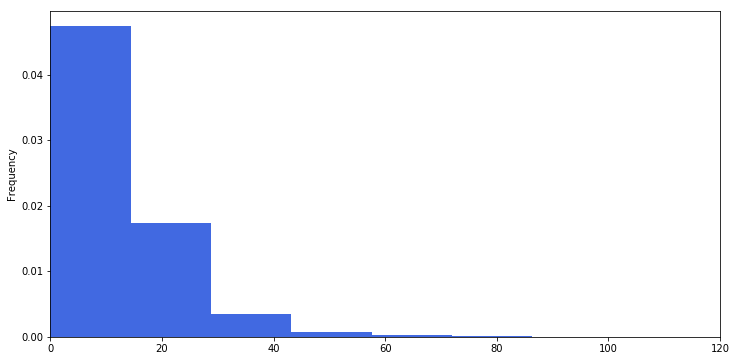

In [18]:
f = plt.figure()
trip_duration.plot(kind='hist',color='royalblue',density=True,bins=100)
plt.xlim(0,120)
f.set_figheight(6)
f.set_figwidth(12)

# maybe better subplot of this two ?

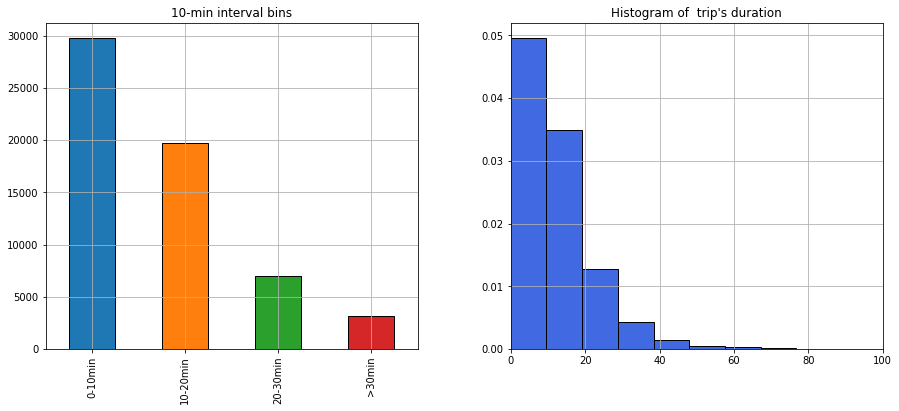

In [19]:
X=trip_duration

f = plt.figure() 
f.set_figheight(6)
f.set_figwidth(15)

plt.subplot(1,2,1)
trip_duration_bins.plot(kind = 'bar',grid=True,title='10-min interval bins',edgecolor="black")

pyl.subplots_adjust(wspace=0.25)

pyl.subplot(1,2,2)
pyl.hist(X,bins=150,edgecolor="black",color='royalblue',density=True)
pyl.title('Histogram of  trip\'s duration')
pyl.grid(True)
pyl.xlim(0,100)

pyl.show()

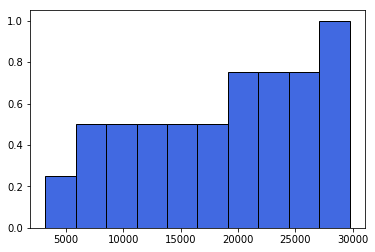

In [20]:
#cdf
data = trip_duration_bins
#histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(data,edgecolor="black",color='royalblue',histtype='bar',density=True,cumulative=True)
plt.show()

(0, 120)

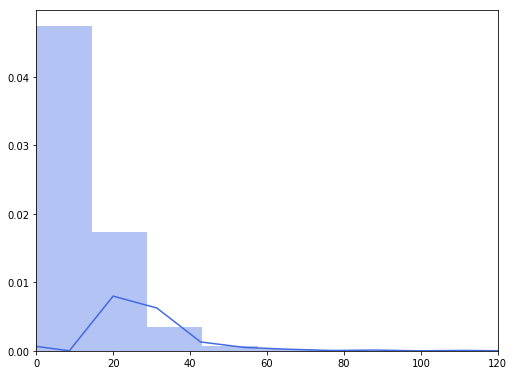

In [32]:
#same with seaborn library
fig, ax = plt.subplots()
fig.set_size_inches(8.27, 6.27)
ax = sns.distplot(trip_duration,hist=True,color='royalblue',bins=100)
plt.xlim(0,120)

# Per reeach borough

In [34]:
#def payments_per_borough(borough_lst):
trip_duration_df=pd.DataFrame()
for i,df_name in enumerate(df_names): #repeating it for every file(aka month) 
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'])
        # merging it with taxi_zone_lookup file(left-join) 
        df=pd.merge(df,taxi_zone_lookup,how='left',left_on='PULocationID',right_on='LocationID')
        df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm')
  
        trip_duration_df=trip_duration_df.append(df.loc[:,['trip_duration','Borough']])

In [35]:
trip_duration_df.shape

(7644500, 2)

In [36]:
np.arange(X.min(), X.max(), 0.1)

array([2.00000e-02, 1.20000e-01, 2.20000e-01, ..., 1.43882e+03,
       1.43892e+03, 1.43902e+03])

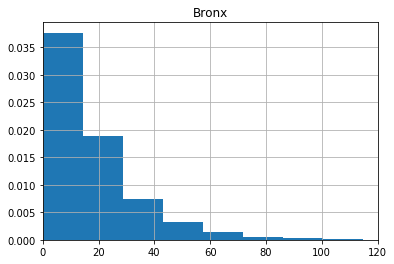

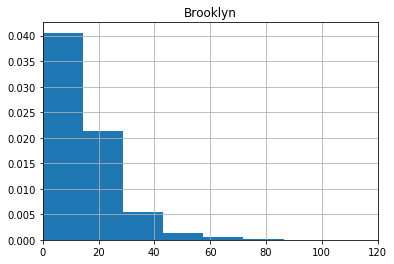

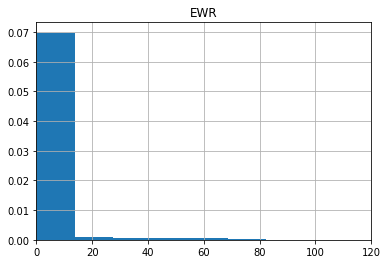

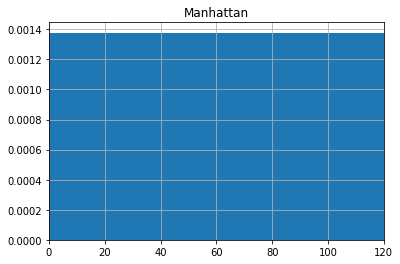

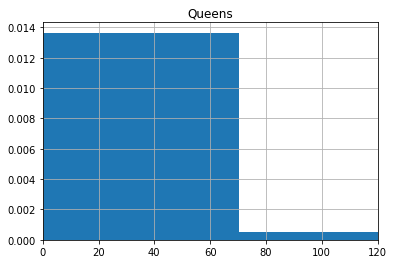

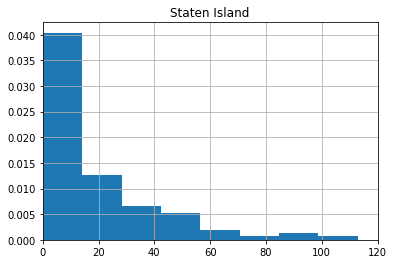

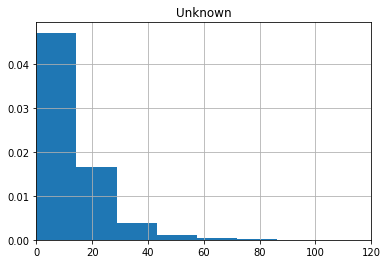

In [37]:
for bor in borough_lst:
  #  f = plt.figure()
    trip_duration_df[trip_duration_df.Borough==bor].hist(bins=100,density=True)
    plt.title(bor)
    plt.xlim(0,120)

In [26]:
#homemade bins??

In [27]:
trip_duration_df['trip_duration']=trip_duration_df.trip_duration.apply(make_bins)

In [28]:
trip_duration_df['counter']=1

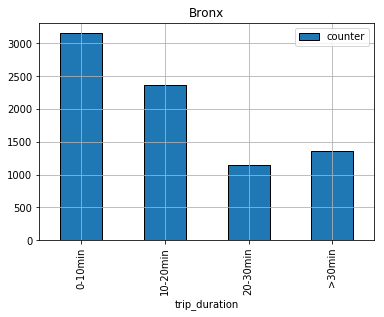

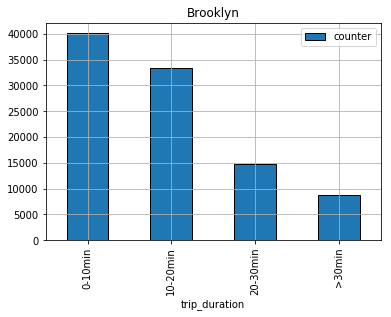

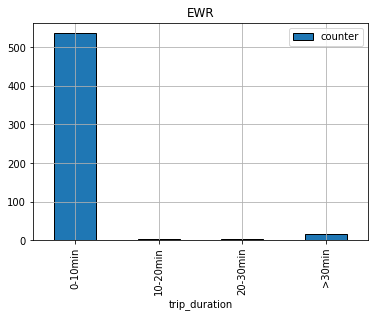

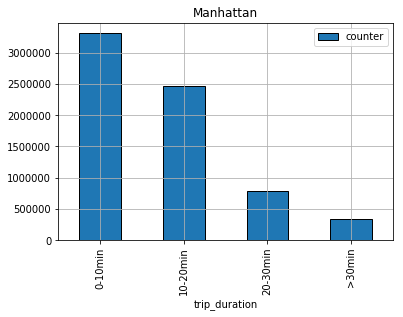

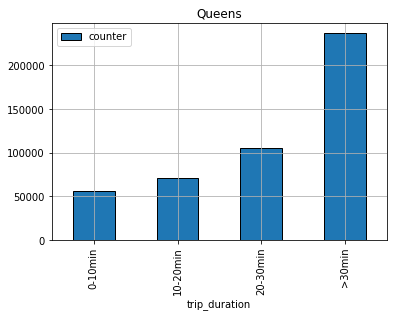

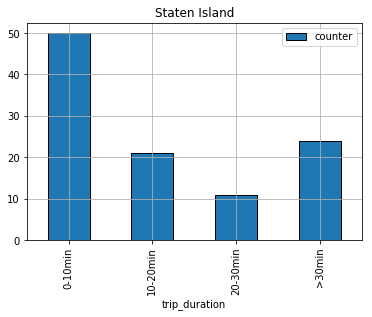

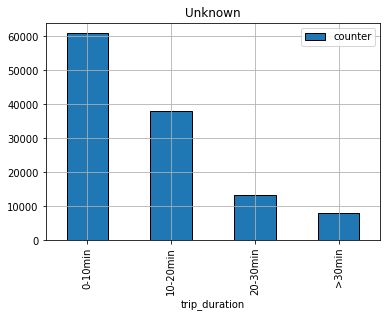

In [29]:
for bor in borough_lst: 
    temp=trip_duration_df.groupby(['Borough','trip_duration']).count()
    temp.loc[bor].plot(kind = 'bar',grid=True,edgecolor="black")
    plt.title(bor)